<a href="https://colab.research.google.com/github/samula98/proj2_01/blob/main/proj2_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 Version 01: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



Be sure to go through the whole data science process and document as such in your Jupyter notebook.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv"
housing_df = pd.read_csv(url)

In [3]:
sales_df = housing_df.copy()

In [4]:
sales_df.shape

(2637, 81)

In [5]:
sales_df.isnull().sum()

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [7]:
sales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


In [8]:
# finding categorical columns
cat_columns = housing_df.select_dtypes(include = ['object']).columns
cat_columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [9]:
num_cat_columns = len(cat_columns)
num_cat_columns

43

In [10]:
for colum in cat_columns:
  num_cats = sales_df[colum].nunique()
  print(f"{colum}: {num_cats} categories")

MS Zoning: 7 categories
Street: 2 categories
Alley: 2 categories
Lot Shape: 4 categories
Land Contour: 4 categories
Utilities: 3 categories
Lot Config: 5 categories
Land Slope: 3 categories
Neighborhood: 28 categories
Condition 1: 9 categories
Condition 2: 8 categories
Bldg Type: 5 categories
House Style: 8 categories
Roof Style: 6 categories
Roof Matl: 8 categories
Exterior 1st: 16 categories
Exterior 2nd: 17 categories
Mas Vnr Type: 4 categories
Exter Qual: 4 categories
Exter Cond: 5 categories
Foundation: 6 categories
Bsmt Qual: 5 categories
Bsmt Cond: 5 categories
Bsmt Exposure: 4 categories
BsmtFin Type 1: 6 categories
BsmtFin Type 2: 6 categories
Heating: 6 categories
Heating QC: 5 categories
Central Air: 2 categories
Electrical: 5 categories
Kitchen Qual: 4 categories
Functional: 8 categories
Fireplace Qu: 5 categories
Garage Type: 6 categories
Garage Finish: 3 categories
Garage Qual: 5 categories
Garage Cond: 5 categories
Paved Drive: 3 categories
Pool QC: 4 categories
Fence: 4

In [11]:
cat_columns2 = sales_df.select_dtypes(include = ['object'])
print(cat_columns2)

     MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
0           RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
1           RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
2           RM   Pave   NaN       Reg          Bnk    AllPub     Inside   
3           FV   Pave   NaN       IR1          Lvl    AllPub     Inside   
4           RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
...        ...    ...   ...       ...          ...       ...        ...   
2632        RM   Pave   NaN       Reg          Lvl    AllPub     Inside   
2633        RL   Pave   NaN       IR1          Lvl    AllPub     Inside   
2634        RL   Pave   NaN       IR1          Lvl    AllPub    CulDSac   
2635        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
2636        RL   Pave   NaN       IR1          Lvl    AllPub        FR2   

     Land Slope Neighborhood Condition 1  ... Garage Type Garage Finish  \
0           Gtl       Sa

In [12]:
sales_df.drop(columns = cat_columns2, axis = 1, inplace = True)
print(sales_df)

            PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0     905101070           20          62.0     14299             4   
1     905101330           90          72.0     10791             4   
2     903454090           50          50.0      9000             6   
3     533244030           60          68.0      7379             8   
4     909252020           70          60.0      7200             7   
...         ...          ...           ...       ...           ...   
2632  903231070           50          52.0      6240             6   
2633  906201021           80          74.0     10778             7   
2634  533253070          120          61.0      3782             8   
2635  527376100           20          78.0     10140             6   
2636  528292060           60          41.0     12460             7   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0                3        1964            1964           0.0         513.0   
1  

In [13]:
sales_df.isnull().sum()

,0
PID,0
MS SubClass,0
Lot Frontage,449
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,23
BsmtFin SF 1,1


In [14]:
sales_df.isnull().sum().sum()

629

In [15]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   Lot Frontage     2188 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Overall Qual     2637 non-null   int64  
 5   Overall Cond     2637 non-null   int64  
 6   Year Built       2637 non-null   int64  
 7   Year Remod/Add   2637 non-null   int64  
 8   Mas Vnr Area     2614 non-null   float64
 9   BsmtFin SF 1     2636 non-null   float64
 10  BsmtFin SF 2     2636 non-null   float64
 11  Bsmt Unf SF      2636 non-null   float64
 12  Total Bsmt SF    2636 non-null   float64
 13  1st Flr SF       2637 non-null   int64  
 14  2nd Flr SF       2637 non-null   int64  
 15  Low Qual Fin SF  2637 non-null   int64  
 16  Gr Liv Area      2637 non-null   int64  
 17  Bsmt Full Bath

In [16]:
sales_df_clean = sales_df.copy()

In [17]:
sales_df_clean.drop(['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt'], axis = 1, inplace = True)
sales_df_clean

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,905101070,20,14299,4,3,1964,1964,513.0,144.0,348.0,...,0,0,0,0,0,0,0,7,2007,115400
1,905101330,90,10791,4,5,1967,1967,0.0,0.0,0.0,...,0,0,0,0,0,0,500,10,2006,90000
2,903454090,50,9000,6,6,1937,1950,0.0,0.0,780.0,...,0,162,0,0,126,0,0,12,2007,141000
3,533244030,60,7379,8,5,2000,2000,484.0,0.0,491.0,...,280,184,0,0,0,0,0,4,2010,254000
4,909252020,70,7200,7,9,1936,2007,350.0,210.0,0.0,...,256,0,0,0,0,0,0,4,2009,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,6240,6,6,1934,1950,0.0,0.0,816.0,...,112,0,0,0,0,0,400,9,2006,114500
2633,906201021,80,10778,7,6,1990,1991,460.0,286.0,308.0,...,114,36,0,0,0,0,0,7,2009,162000
2634,533253070,120,3782,8,5,1981,1981,960.0,0.0,266.0,...,133,78,0,0,0,0,0,9,2009,211500
2635,527376100,20,10140,6,5,1974,1974,0.0,0.0,1064.0,...,0,0,0,0,0,0,0,8,2009,165000


In [20]:
sales_df_clean.isnull().sum()

,0
PID,0
MS SubClass,0
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
BsmtFin SF 1,1
BsmtFin SF 2,1
Bsmt Unf SF,1


In [22]:
# replacing nulls with the mean of the column:
# BsmtFin SF 1
mean_bsmtfinsf1 = sales_df_clean['BsmtFin SF 1'].mean()
sales_df_clean['BsmtFin SF 1'].fillna(mean_bsmtfinsf1, inplace = True)

<ipython-input-22-1be469fb729c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df_clean['BsmtFin SF 1'].fillna(mean_bsmtfinsf1, inplace = True)


In [23]:
# double checking there are no nulls in the column:
sales_df_clean['BsmtFin SF 1'].isnull().sum()

0

In [25]:
# BsmtFin SF 2
mean_bsmtfinsf2 = sales_df_clean['BsmtFin SF 2'].mean()
sales_df_clean['BsmtFin SF 2'].fillna(mean_bsmtfinsf2, inplace = True)
sales_df_clean['BsmtFin SF 2'].isnull().sum()

<ipython-input-25-f21605ef88f2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df_clean['BsmtFin SF 2'].fillna(mean_bsmtfinsf2, inplace = True)


0

In [26]:
# Bsmt Unf SF
mean_bsmtunfsf = sales_df_clean['Bsmt Unf SF'].mean()
sales_df_clean['Bsmt Unf SF'].fillna(mean_bsmtunfsf, inplace = True)
sales_df_clean['Bsmt Unf SF'].isnull().sum()

<ipython-input-26-508072c01ea3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df_clean['Bsmt Unf SF'].fillna(mean_bsmtunfsf, inplace = True)


0

In [27]:
# Total Bsmt SF
mean_totbsmtsf = sales_df_clean['Total Bsmt SF'].mean()
sales_df_clean['Total Bsmt SF'].fillna(mean_totbsmtsf, inplace = True)
sales_df_clean['Total Bsmt SF'].isnull().sum()

<ipython-input-27-45f3b74da00c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df_clean['Total Bsmt SF'].fillna(mean_totbsmtsf, inplace = True)


0

In [28]:
# Bsmt Full Bath
mean_bsmtfullbath = sales_df_clean['Bsmt Full Bath'].mean()
sales_df_clean['Bsmt Full Bath'].fillna(mean_bsmtfullbath, inplace = True)
sales_df_clean['Bsmt Full Bath'].isnull().sum()

<ipython-input-28-ac7235d537bb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df_clean['Bsmt Full Bath'].fillna(mean_bsmtfullbath, inplace = True)


0

In [29]:
# Bsmt Half Bath
mean_bsmthalfbath = sales_df_clean['Bsmt Half Bath'].mean()
sales_df_clean['Bsmt Half Bath'].fillna(mean_bsmthalfbath, inplace = True)
sales_df_clean['Bsmt Half Bath'].isnull().sum()

<ipython-input-29-2fee23dba103>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df_clean['Bsmt Half Bath'].fillna(mean_bsmthalfbath, inplace = True)


0

In [30]:
# Garage Cars
mean_garagecars = sales_df_clean['Garage Cars'].mean()
sales_df_clean['Garage Cars'].fillna(mean_garagecars, inplace = True)
sales_df_clean['Garage Cars'].isnull().sum()

<ipython-input-30-aa618d30a7b2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df_clean['Garage Cars'].fillna(mean_garagecars, inplace = True)


0

In [31]:
# Garage Area
mean_garagearea = sales_df_clean['Garage Area'].mean()
sales_df_clean['Garage Area'].fillna(mean_garagearea, inplace = True)
sales_df_clean['Garage Area'].isnull().sum()

<ipython-input-31-f40cd4820a92>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df_clean['Garage Area'].fillna(mean_garagearea, inplace = True)


0

In [34]:
# making sure there are no nulls left
sales_df_clean.isnull().sum().sum()

0

In [42]:
sales_df_clean.shape

(2637, 35)

<Axes: >

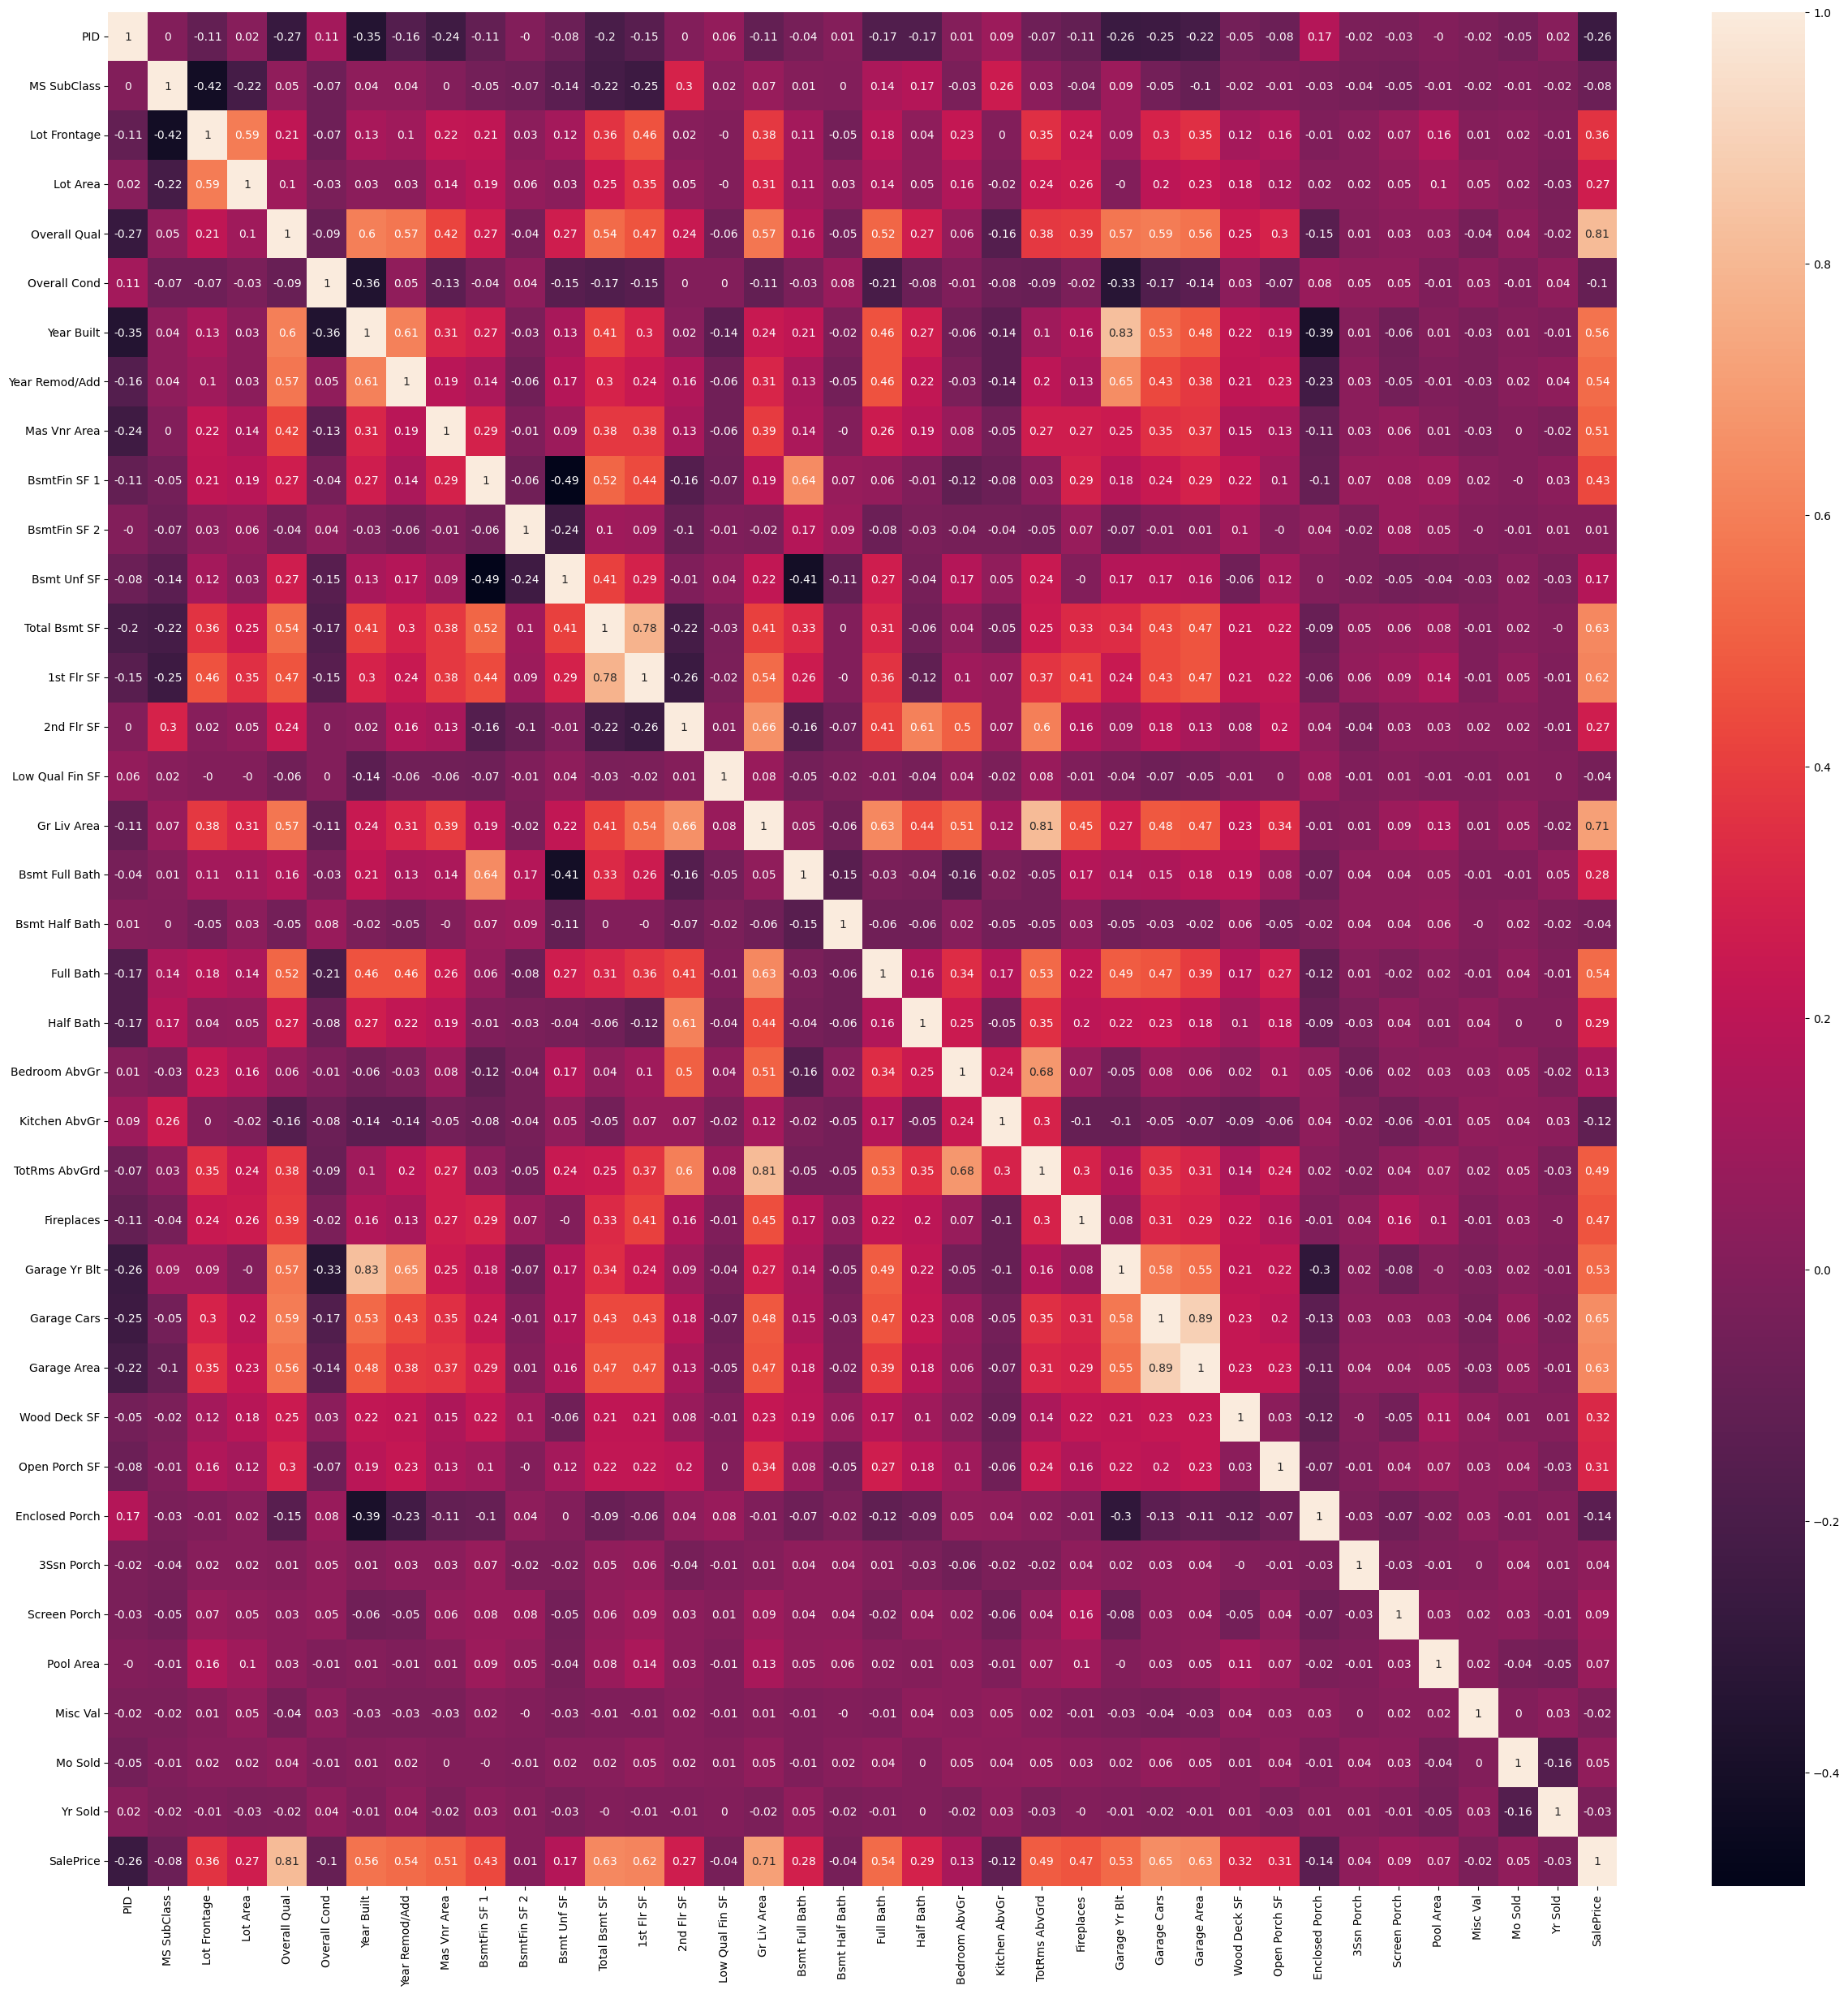

In [41]:
# correlation plot
plt.figure(figsize = (30,30))
correlation_matrix = sales_df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

In [36]:
# filtered correlation plot
rs = np.random.RandomState(0)
corr = sales_df.corr()
# filter the c.matrix
filter_corr = corr[(corr >= 0.7) | (corr <= -0.7)]
filter_corr.style.background_gradient(cmap = 'plasma')

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MS SubClass,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Lot Frontage,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Lot Area,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Overall Qual,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.805016
Overall Cond,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Year Built,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.831714,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Year Remod/Add,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Mas Vnr Area,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BsmtFin SF 1,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


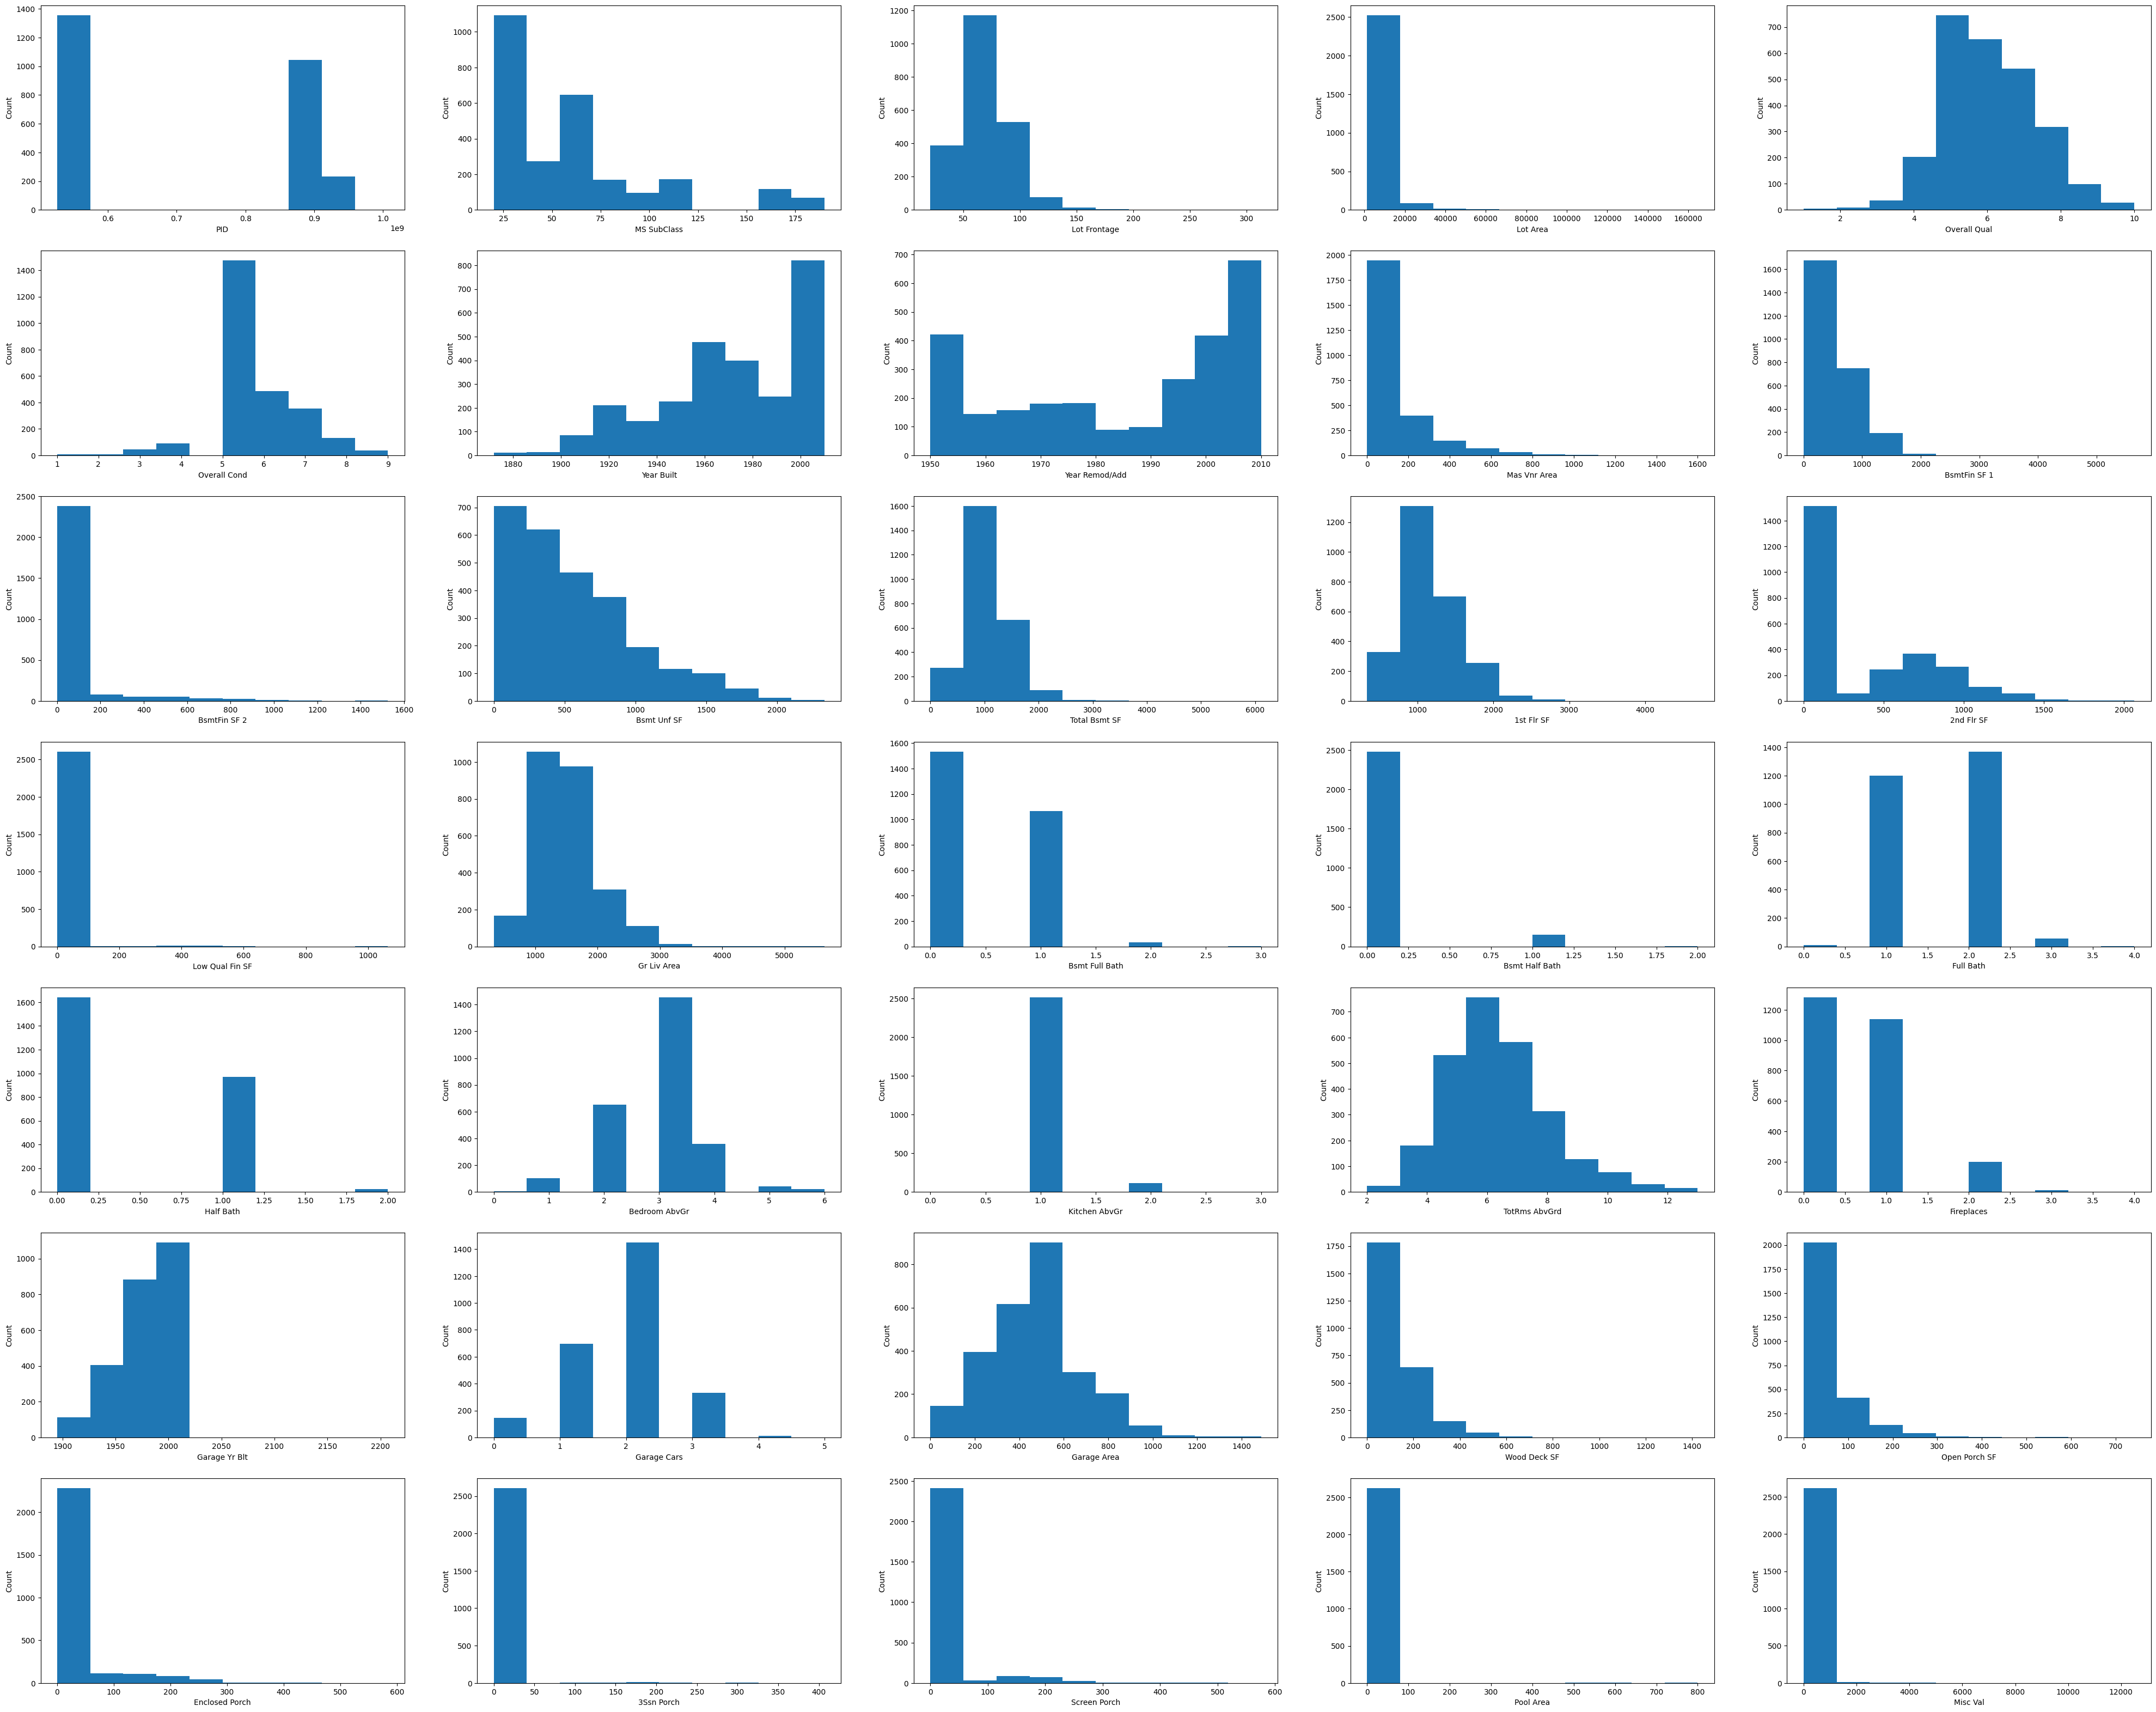

In [48]:
fig, axs = plt.subplots(7,5,figsize = (50,40))
column_names = sales_df.columns
n = 0
for i in range(7):
  for j in range(5):
    axs[i,j].hist(sales_df[column_names[n]])
    axs[i,j].set_xlabel(column_names[n])
    axs[i,j].set_ylabel('Count')
    n = n + 1

NameError: name 'subplots' is not defined

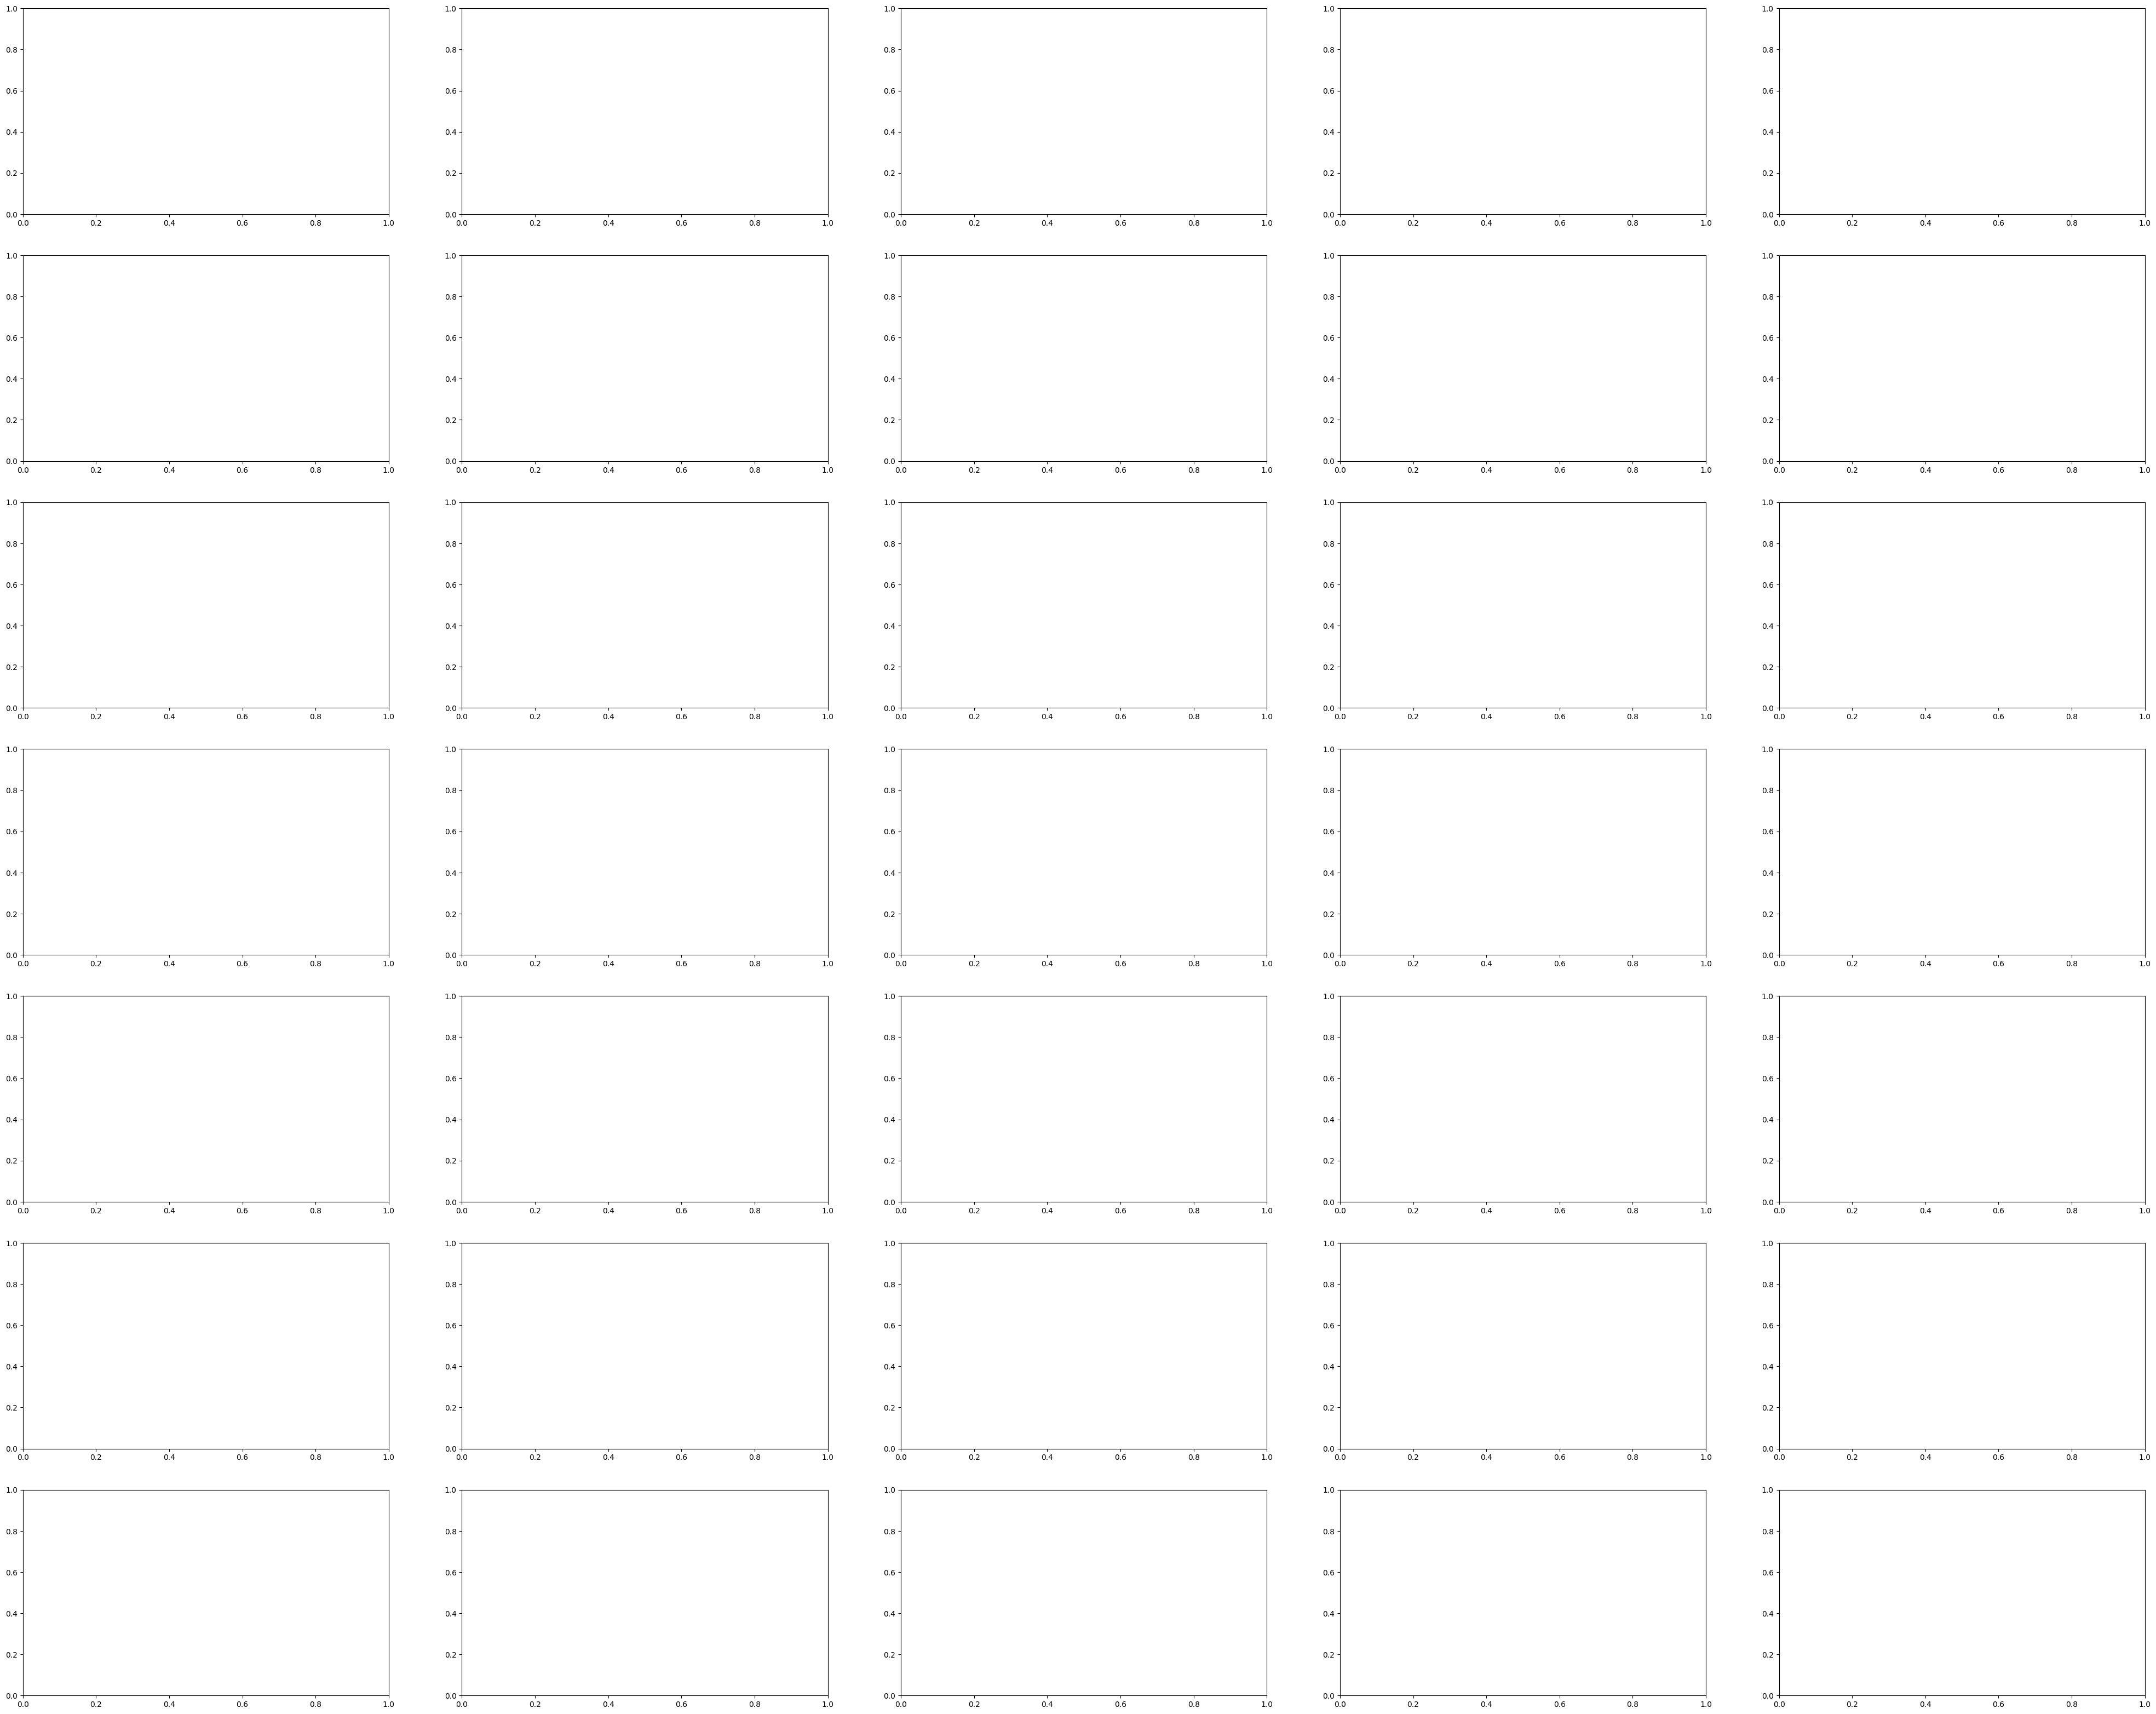

In [49]:
# plotting our predictors
fig, subplot = plt.subplots(7,5,figsize = (50,40))
column_names = sales_df.columns

subplots = subplots.flatten()#[:len(column_names)]
for n, subplot in enumerate(subplots):
  subplot.hist(sales_df[column_names[n]])
  subplot.set_xlabel(column_names[n])
  subplot.set_ylabel('Count')